## Challenge Problem 1.1 (From *Computational Physics* Newman)
The simple harmonic oscillator crops up in many places. Its behaviors can be studied readily using analytic methods and it has the important property that its period of oscillation is constant, independent of its amplitude, making it useful, for instance, for keeping time in watches and clocks. 
Frequently in physics, however, we also come across anharmonic oscillators, whose period varies with amplitude and whose behavior cannot usually be calculated analytically. A general classical oscillator can be thought of as a particle in a concave potential well. When disturbed, the particle will rock back and forth in the well. The harmonic oscillator corresponds to a quadratic potential $V(x)\alpha x^2$. Any other form gives an anharmonic oscillator.
One way to calculate the motion of an oscillator is to write down the equation for the conservation of enregy in the system. If the particle has a mass *m* and position *x*, then the total energy is equal to the sum of the kinetic and potential energies thus: $$E = \frac{1}{2}m\left(\frac{dx}{dt}\right)^2 + V(x).$$ Since the energy must be constant over time, this equation is effectively a differential equation linking *x* and *t*. 
Let us assume that the potential $V(x)$ is symmetric about $x=0$ and let us set our anharmonic oscillator going with amplitude *a* and it swings back towards the origin. Then at $t=0$ we have $dx/dt=0$.

(a) Convince yourself that the period of this oscillator is $$T = \int_{0}^{a} \frac{dx}{\sqrt{V(a)-V(x)}}$$.

(b) Write a program in Python and MATLAB that takes the amplitude *a* as an argument and calculates the period of an anharmonic ocsillator with a mass $m=1$ and potential $V(x)=x^4$. Experiment with different integral functions.

(c) Use your function to make a graph of the period for amplitudes ranging from $a=0$ to $a=4$. Do the results match your physical intuition?

## Interprete T
We notice that when $x=a$, $dx/dt=0$, making energy $$E=V(a)$$
Seperate x and t, $$\sqrt{\frac{2}{m}(V(a)-V(x))}=\pm \frac{dx}{dt}$$
At $t=0$ we have $dx/dt=0$, so it starts at $x=a$. If we integrate x from a to 0, t from 0 to $T/4$, then $dx/dt$ should be negative. We get: $$\sqrt{\frac{2}{m}}\frac{1}{4}T = \int_0^a\frac{dx}{\sqrt{V(a)-V(x)}}$$
Thus, the period of the oscillator is given by:
$$T = \sqrt{8m}\int_0^a\frac{dx}{\sqrt{V(a)-V(x)}}$$

## Calculate T(a) dependence directly using for loop and myint.py

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import myint

In [59]:
epsilon = 10e-5                      # define an infinitesimal to avoid x=a situation in integral
arange = np.linspace(10e-3,4,1000)    # range for a starts at 0.01 to avoid a=0 & x=0 situation
N = 10  # step number of integration

int1_f = []
int2_f = []
int3_f = []
int4_f = []
int5_f = []

for a in arange:
    
    f = lambda x: 1/np.sqrt(8*(a**4 - x**4))
    inttrap_f = myint.trapezoidrule(f,0,a-epsilon,N)
    intsimp_f = myint.trapezoidrule(f,0,a-epsilon,N)
    intcub_f = myint.trapezoidrule(f,0,a-epsilon,N)
    intquar_f = myint.trapezoidrule(f,0,a-epsilon,N)
    intromb_f = myint.trapezoidrule(f,0,a-epsilon,N)
    
    int1_f.append(inttrap_f)
    int2_f.append(intsimp_f)
    int3_f.append(intcub_f)
    int4_f.append(intquar_f)
    int5_f.append(intromb_f)
    


Text(0,0.5,'T')

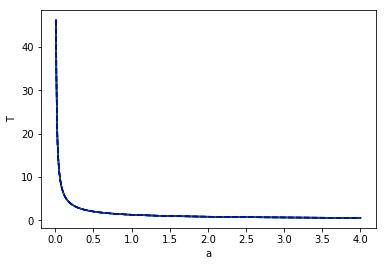

In [60]:
# Plot T(a) dependence for a in (0,4)
plt.figure(1)
plt.plot(arange,int1_f,'-k')
plt.plot(arange,int2_f,'-b')
plt.plot(arange,int3_f,'-g')
plt.plot(arange,int4_f,'--k')
plt.plot(arange,int5_f,'--b')
plt.xlabel(r'a')
plt.ylabel(r'T')

Text(0,0.5,'T')

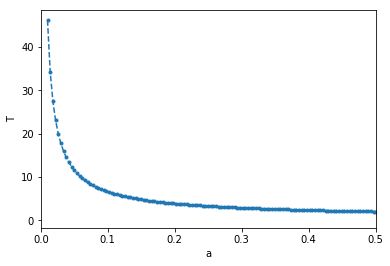

In [72]:
# A zoom in plot of T(a) dependence for a in (0,0.5)
plt.figure(2)
plt.plot(arange,int5_f,'--.')
plt.xlim(0,0.5)
plt.xlabel(r'a')
plt.ylabel(r'T')

## Comments
We can see from the graph that amplitude dependence of period for anharmonic oscillator seems as the same shape of function $y=1/\sqrt{x}$. And this can be predicted directly from the expression for $T$:
$$T = \sqrt{8m}\int_0^a\frac{dx}{a^4-x^4}$$
If we set $x=ay$, and change integration variable $x$ to $y$:
$$T = \sqrt{\frac{8m}{a}}\int_0^1\frac{dy}{1-y^4}$$
And period is actually proportional to $1/\sqrt{a}$.